# Togo Solar Data - Exploratory Data Analysis

**Dataset:** togo-dapaong_qc.csv  
**Objective:** Profile, clean, and explore the Togo solar dataset to identify key trends and insights for solar investment decisions.

## Table of Contents
1. Setup & Data Loading
2. Summary Statistics & Missing Values
3. Outlier Detection & Data Quality
4. Data Cleaning
5. Time Series Analysis
6. Cleaning Impact Analysis
7. Correlation & Relationship Analysis
8. Wind Analysis & Distributions
9. Temperature & Humidity Analysis
10. Bubble Chart Analysis
11. Key Insights & Conclusions


## 1. Setup & Data Loading


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [17]:
# Load the dataset
data_path = '../data/togo-dapaong_qc.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset loaded successfully!
Shape: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [18]:
# Initial data inspection
print("=" * 80)
print("FIRST 5 ROWS:")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("LAST 5 ROWS:")
print("=" * 80)
display(df.tail())

print("\n" + "=" * 80)
print("DATA TYPES:")
print("=" * 80)
display(df.dtypes)


FIRST 5 ROWS:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN


LAST 5 ROWS:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0  0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0  0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0  0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN


DATA TYPES:


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

## 2. Summary Statistics & Missing Values


In [19]:
# Summary statistics for all numeric columns
print("=" * 80)
print("SUMMARY STATISTICS FOR NUMERIC COLUMNS")
print("=" * 80)
summary_stats = df.describe()
display(summary_stats)


SUMMARY STATISTICS FOR NUMERIC COLUMNS


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [20]:
# Missing values analysis
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    
    # Flag columns with >5% missing values
    high_missing = missing_df[missing_df['Missing Percentage'] > 5]
    if len(high_missing) > 0:
        print("\n⚠️ Columns with >5% missing values:")
        for col in high_missing['Column']:
            print(f"  - {col}: {high_missing[high_missing['Column']==col]['Missing Percentage'].values[0]:.2f}%")
else:
    print("✓ No missing values found in the dataset!")


MISSING VALUES ANALYSIS


Column  Missing Count  Missing Percentage
18  Comments         525600               100.0


⚠️ Columns with >5% missing values:
  - Comments: 100.00%


## 3. Outlier Detection & Data Quality


In [21]:
# Check for negative values in solar radiation columns
print("=" * 80)
print("DATA QUALITY CHECK: NEGATIVE VALUES IN SOLAR RADIATION")
print("=" * 80)

solar_cols = ['GHI', 'DNI', 'DHI']
for col in solar_cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        negative_pct = (negative_count / len(df)) * 100
        print(f"{col}: {negative_count} negative values ({negative_pct:.2f}%)")
        
print("\nNote: Negative values during nighttime are expected, but should be investigated for daytime readings.")


DATA QUALITY CHECK: NEGATIVE VALUES IN SOLAR RADIATION
GHI: 257385 negative values (48.97%)
DNI: 0 negative values (0.00%)
DHI: 0 negative values (0.00%)

Note: Negative values during nighttime are expected, but should be investigated for daytime readings.


In [22]:
# Compute Z-scores for outlier detection
print("=" * 80)
print("OUTLIER DETECTION USING Z-SCORES (|Z| > 3)")
print("=" * 80)

# Columns to check for outliers
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Create a copy for outlier analysis
df_outlier = df.copy()

# Store outlier information
outlier_summary = []

for col in outlier_cols:
    if col in df.columns:
        # Calculate Z-scores
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        
        # Count outliers (|Z| > 3)
        outliers = np.sum(z_scores > 3)
        outlier_pct = (outliers / len(df[col].dropna())) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outliers': outliers,
            'Outlier Percentage': outlier_pct
        })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)


OUTLIER DETECTION USING Z-SCORES (|Z| > 3)


Column  Outliers  Outlier Percentage
0     GHI       305            0.058029
1     DNI      1062            0.202055
2     DHI      3415            0.649734
3    ModA       137            0.026065
4    ModB       206            0.039193
5      WS      3510            0.667808
6  WSgust      3915            0.744863

## 4. Data Cleaning


In [23]:
# Create a cleaned copy of the dataset
df_clean = df.copy()

print("=" * 80)
print("DATA CLEANING PROCESS")
print("=" * 80)

print(f"\nOriginal dataset shape: {df_clean.shape}")

# Step 1: Handle missing values in key columns with median imputation
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD', 'BP']

for col in key_columns:
    if col in df_clean.columns:
        missing_before = df_clean[col].isnull().sum()
        if missing_before > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"✓ {col}: Imputed {missing_before} missing values with median ({median_val:.2f})")

# Step 2: Remove rows with critical missing data (Comments can be missing)
# Only drop rows where all key sensor readings are missing
critical_cols = ['GHI', 'DNI', 'DHI']
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=critical_cols, how='all')
rows_after = len(df_clean)
rows_dropped = rows_before - rows_after

if rows_dropped > 0:
    print(f"\n✓ Dropped {rows_dropped} rows with all critical solar radiation values missing")

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")


DATA CLEANING PROCESS

Original dataset shape: (525600, 19)

Cleaned dataset shape: (525600, 19)
Rows removed: 0
Remaining missing values: 525600


In [24]:
# Export cleaned dataset
output_path = '../data/togo-dapaong_qc_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"✓ Cleaned dataset exported to: {output_path}")
print(f"✓ File size: {len(df_clean)} rows × {len(df_clean.columns)} columns")


✓ Cleaned dataset exported to: ../data/togo-dapaong_qc_clean.csv
✓ File size: 525600 rows × 19 columns


## 5. Time Series Analysis


In [25]:
# Convert Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

print("✓ Timestamp converted to datetime index")
print(f"Date range: {df_clean.index.min()} to {df_clean.index.max()}")


✓ Timestamp converted to datetime index
Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00


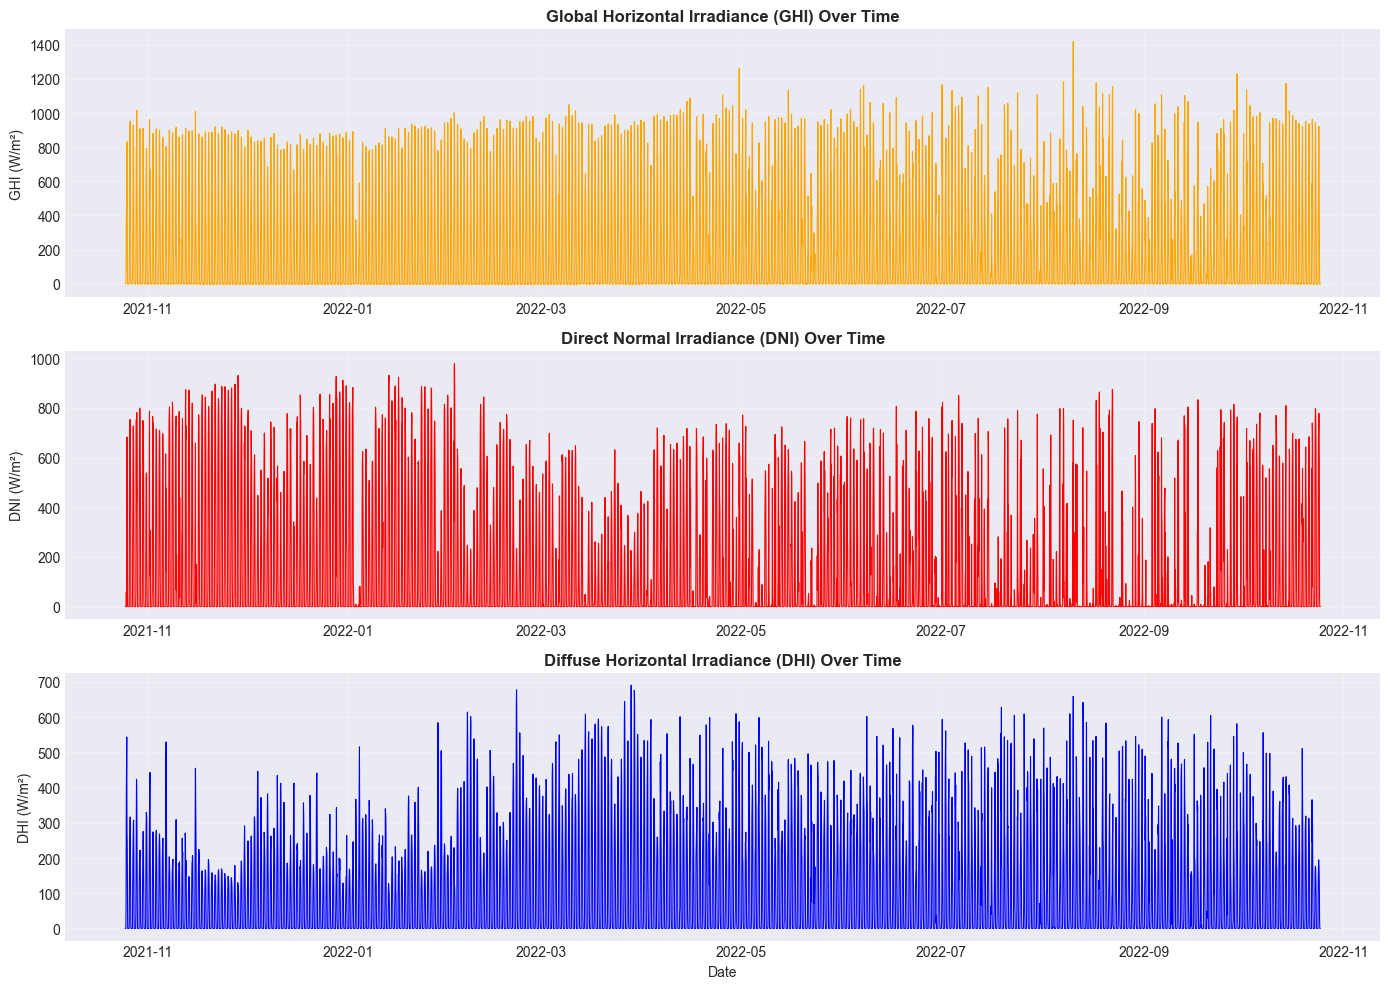

In [26]:
# Time series plot: Solar Radiation (GHI, DNI, DHI) over time
# Sample data for visualization (every 100th point to avoid overcrowding)
sample_df = df_clean.iloc[::100]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# GHI
axes[0].plot(sample_df.index, sample_df['GHI'], color='orange', linewidth=0.8)
axes[0].set_title('Global Horizontal Irradiance (GHI) Over Time', fontsize=12, fontweight='bold')
axes[0].set_ylabel('GHI (W/m²)', fontsize=10)
axes[0].grid(True, alpha=0.3)

# DNI
axes[1].plot(sample_df.index, sample_df['DNI'], color='red', linewidth=0.8)
axes[1].set_title('Direct Normal Irradiance (DNI) Over Time', fontsize=12, fontweight='bold')
axes[1].set_ylabel('DNI (W/m²)', fontsize=10)
axes[1].grid(True, alpha=0.3)

# DHI
axes[2].plot(sample_df.index, sample_df['DHI'], color='blue', linewidth=0.8)
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) Over Time', fontsize=12, fontweight='bold')
axes[2].set_ylabel('DHI (W/m²)', fontsize=10)
axes[2].set_xlabel('Date', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


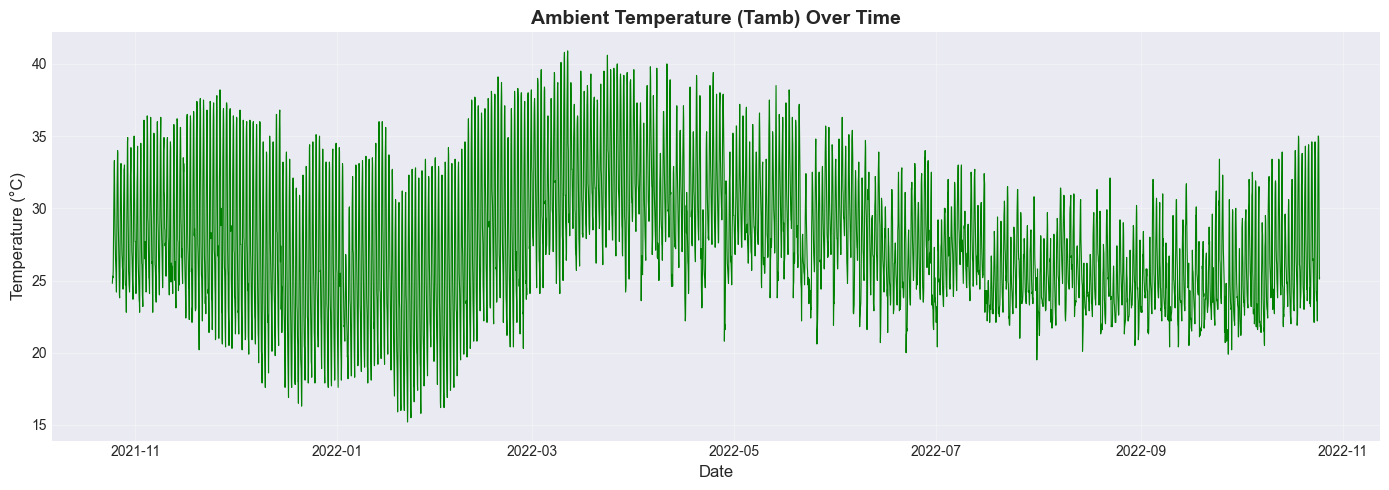

In [27]:
# Time series plot: Temperature over time
plt.figure(figsize=(14, 5))
plt.plot(sample_df.index, sample_df['Tamb'], color='green', linewidth=0.8)
plt.title('Ambient Temperature (Tamb) Over Time', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


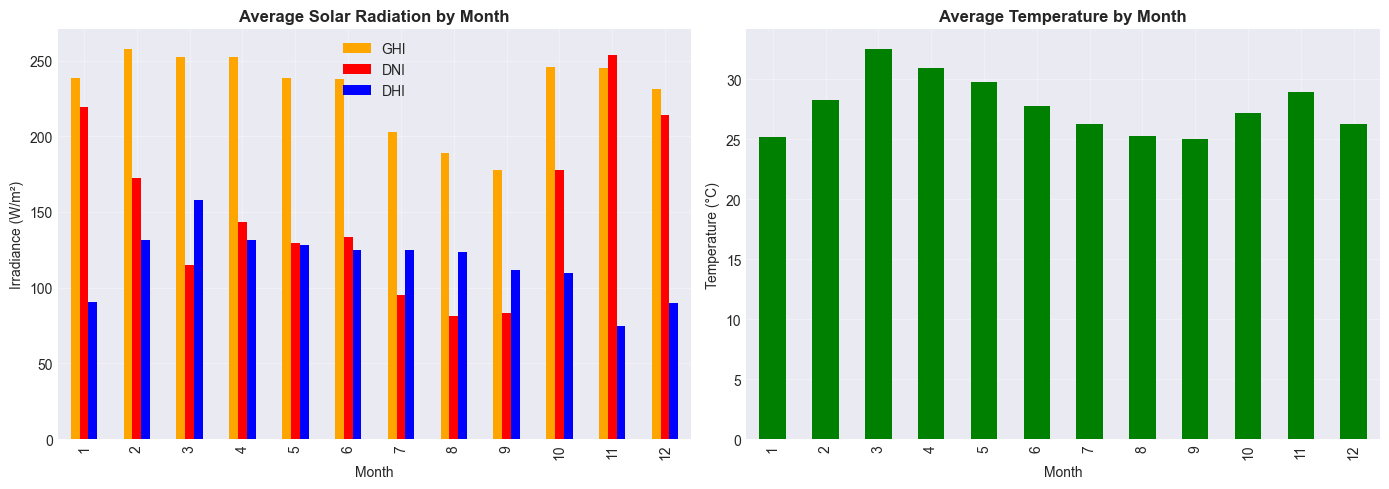

In [28]:
# Monthly trend analysis
df_clean['Month'] = df_clean.index.month
df_clean['Hour'] = df_clean.index.hour

# Monthly averages
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Solar radiation by month
monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='bar', ax=axes[0], color=['orange', 'red', 'blue'])
axes[0].set_title('Average Solar Radiation by Month', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Irradiance (W/m²)', fontsize=10)
axes[0].legend(['GHI', 'DNI', 'DHI'])
axes[0].grid(True, alpha=0.3)

# Temperature by month
monthly_avg['Tamb'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Average Temperature by Month', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Temperature (°C)', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


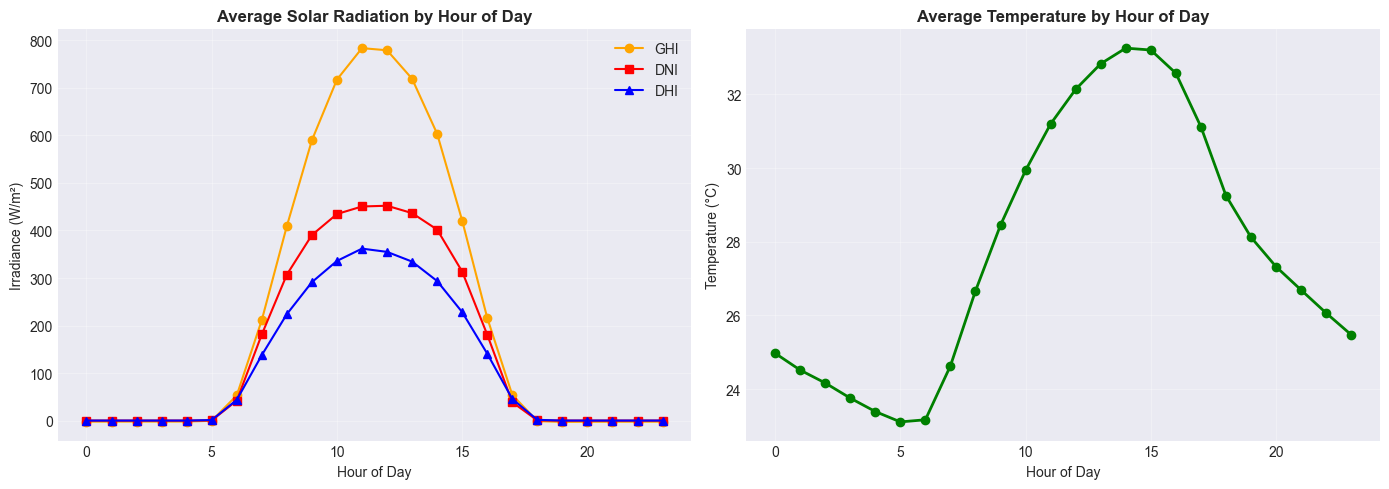


📊 Key Observations:
  - Peak GHI occurs around hour 11
  - Peak temperature occurs around hour 14


In [29]:
# Hourly (daily) pattern analysis
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Solar radiation by hour
axes[0].plot(hourly_avg.index, hourly_avg['GHI'], marker='o', label='GHI', color='orange')
axes[0].plot(hourly_avg.index, hourly_avg['DNI'], marker='s', label='DNI', color='red')
axes[0].plot(hourly_avg.index, hourly_avg['DHI'], marker='^', label='DHI', color='blue')
axes[0].set_title('Average Solar Radiation by Hour of Day', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=10)
axes[0].set_ylabel('Irradiance (W/m²)', fontsize=10)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Temperature by hour
axes[1].plot(hourly_avg.index, hourly_avg['Tamb'], marker='o', color='green', linewidth=2)
axes[1].set_title('Average Temperature by Hour of Day', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=10)
axes[1].set_ylabel('Temperature (°C)', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print(f"  - Peak GHI occurs around hour {hourly_avg['GHI'].idxmax()}")
print(f"  - Peak temperature occurs around hour {hourly_avg['Tamb'].idxmax()}")


## 6. Cleaning Impact Analysis


CLEANING IMPACT ON SENSOR READINGS

Average Sensor Readings by Cleaning Flag:


ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744

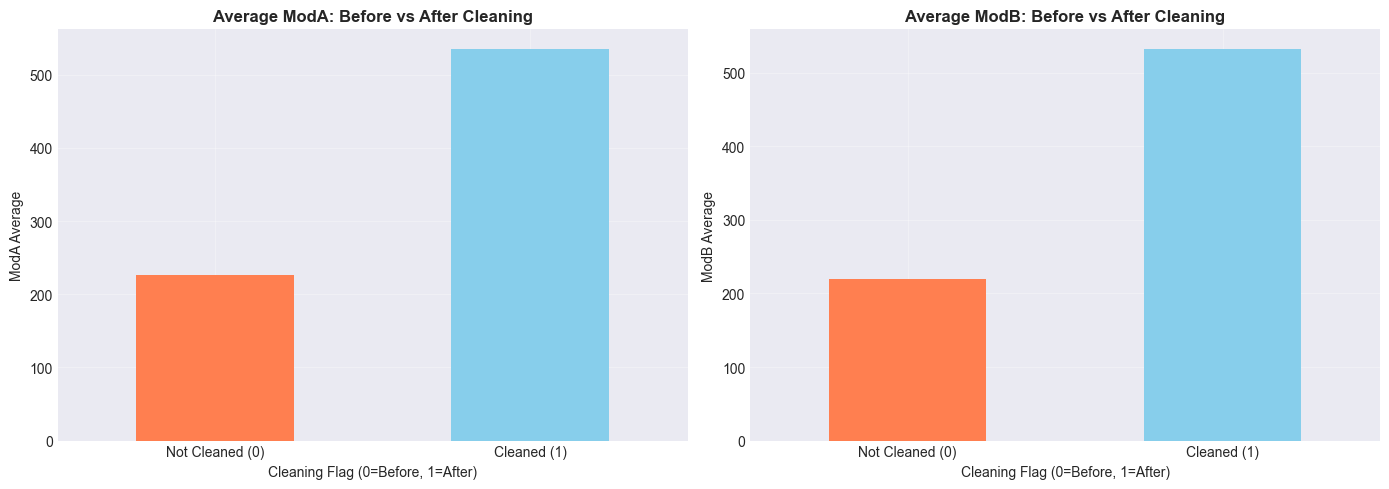


📊 Impact of Cleaning:
  - ModA change: 136.83%
  - ModB change: 142.57%


In [30]:
# Analyze impact of cleaning on sensor readings (ModA and ModB)
print("=" * 80)
print("CLEANING IMPACT ON SENSOR READINGS")
print("=" * 80)

# Group by cleaning flag
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

print("\nAverage Sensor Readings by Cleaning Flag:")
display(cleaning_impact)

# Visualize the impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ModA comparison
cleaning_impact['ModA'].plot(kind='bar', ax=axes[0], color=['coral', 'skyblue'])
axes[0].set_title('Average ModA: Before vs After Cleaning', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cleaning Flag (0=Before, 1=After)', fontsize=10)
axes[0].set_ylabel('ModA Average', fontsize=10)
axes[0].set_xticklabels(['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)
axes[0].grid(True, alpha=0.3)

# ModB comparison
cleaning_impact['ModB'].plot(kind='bar', ax=axes[1], color=['coral', 'skyblue'])
axes[1].set_title('Average ModB: Before vs After Cleaning', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cleaning Flag (0=Before, 1=After)', fontsize=10)
axes[1].set_ylabel('ModB Average', fontsize=10)
axes[1].set_xticklabels(['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate percentage difference
if 0 in cleaning_impact.index and 1 in cleaning_impact.index:
    pct_diff_moda = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100
    pct_diff_modb = ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
    
    print(f"\n📊 Impact of Cleaning:")
    print(f"  - ModA change: {pct_diff_moda:.2f}%")
    print(f"  - ModB change: {pct_diff_modb:.2f}%")


## 7. Correlation & Relationship Analysis

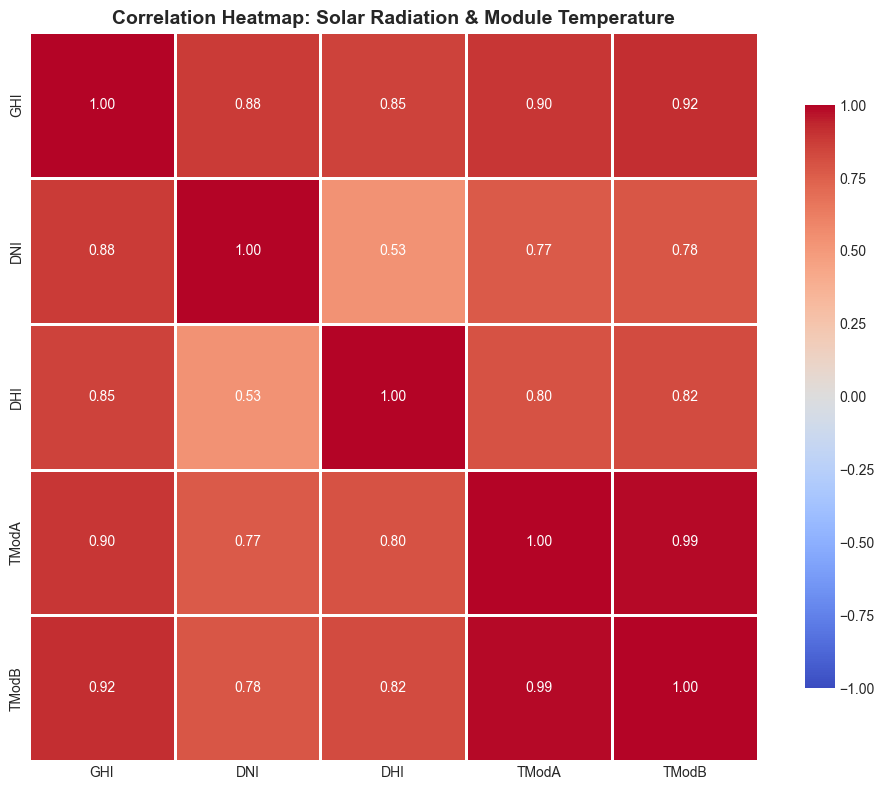

Key correlations identified in the heatmap above.


In [31]:
# Correlation heatmap for key variables
correlation_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Solar Radiation & Module Temperature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Key correlations identified in the heatmap above.")


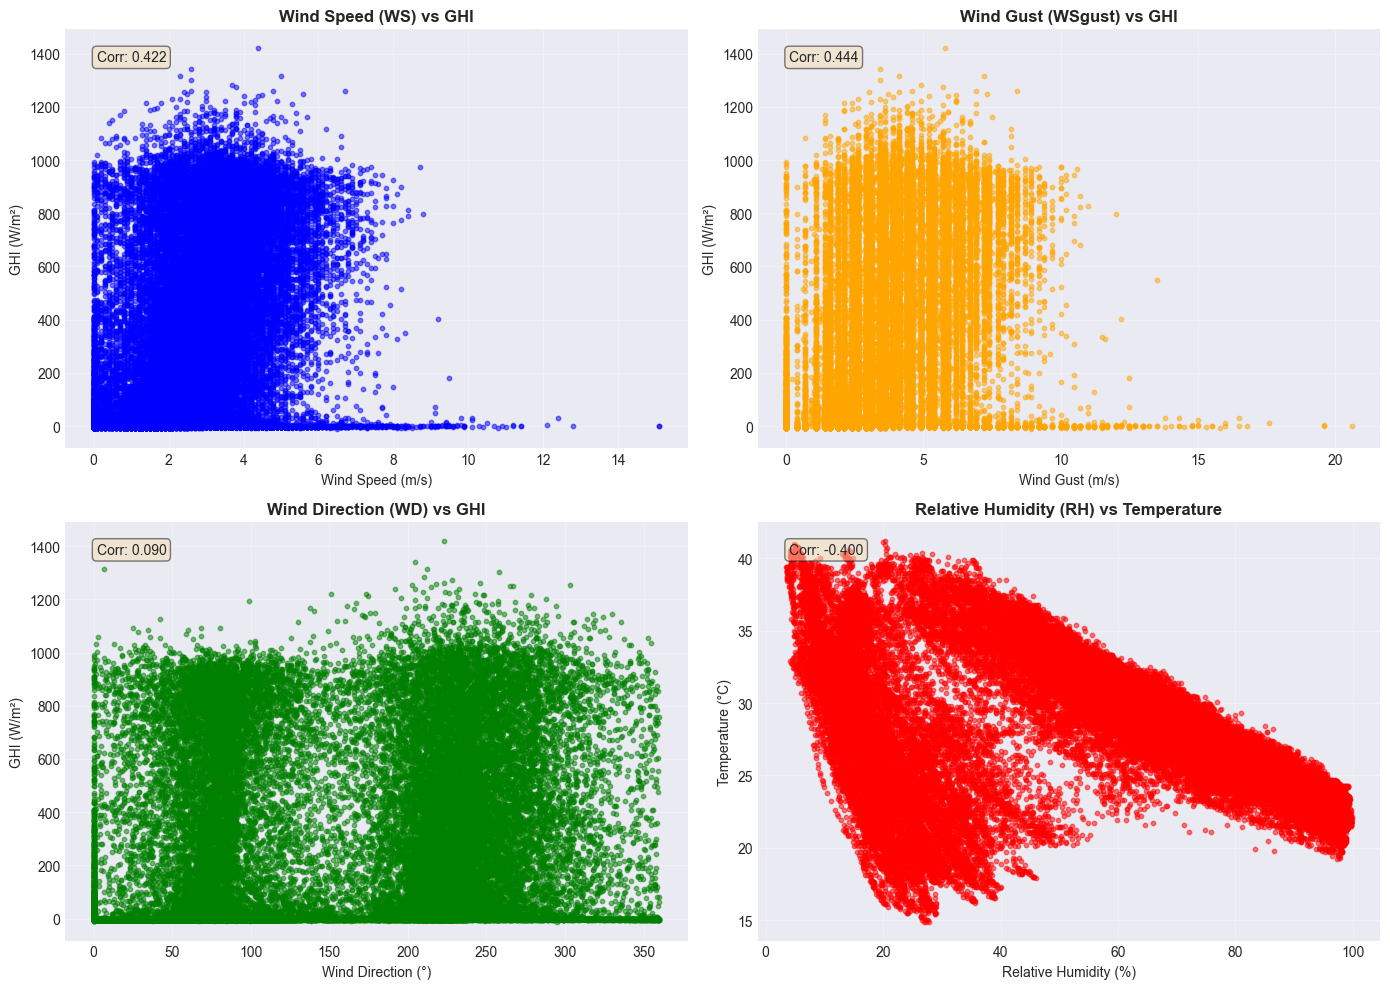

In [32]:
# Scatter plots: Wind conditions vs Solar Radiation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sample data for scatter plots (use every 10th point to avoid overcrowding)
scatter_sample = df_clean.iloc[::10]

# WS vs GHI
axes[0, 0].scatter(scatter_sample['WS'], scatter_sample['GHI'], alpha=0.5, s=10, color='blue')
axes[0, 0].set_title('Wind Speed (WS) vs GHI', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Wind Speed (m/s)', fontsize=10)
axes[0, 0].set_ylabel('GHI (W/m²)', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
# Add correlation coefficient
corr_ws_ghi = df_clean['WS'].corr(df_clean['GHI'])
axes[0, 0].text(0.05, 0.95, f'Corr: {corr_ws_ghi:.3f}', transform=axes[0, 0].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# WSgust vs GHI
axes[0, 1].scatter(scatter_sample['WSgust'], scatter_sample['GHI'], alpha=0.5, s=10, color='orange')
axes[0, 1].set_title('Wind Gust (WSgust) vs GHI', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Wind Gust (m/s)', fontsize=10)
axes[0, 1].set_ylabel('GHI (W/m²)', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
corr_wsg_ghi = df_clean['WSgust'].corr(df_clean['GHI'])
axes[0, 1].text(0.05, 0.95, f'Corr: {corr_wsg_ghi:.3f}', transform=axes[0, 1].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# WD vs GHI
axes[1, 0].scatter(scatter_sample['WD'], scatter_sample['GHI'], alpha=0.5, s=10, color='green')
axes[1, 0].set_title('Wind Direction (WD) vs GHI', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Wind Direction (°)', fontsize=10)
axes[1, 0].set_ylabel('GHI (W/m²)', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
corr_wd_ghi = df_clean['WD'].corr(df_clean['GHI'])
axes[1, 0].text(0.05, 0.95, f'Corr: {corr_wd_ghi:.3f}', transform=axes[1, 0].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# RH vs Tamb
axes[1, 1].scatter(scatter_sample['RH'], scatter_sample['Tamb'], alpha=0.5, s=10, color='red')
axes[1, 1].set_title('Relative Humidity (RH) vs Temperature', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Relative Humidity (%)', fontsize=10)
axes[1, 1].set_ylabel('Temperature (°C)', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
corr_rh_tamb = df_clean['RH'].corr(df_clean['Tamb'])
axes[1, 1].text(0.05, 0.95, f'Corr: {corr_rh_tamb:.3f}', transform=axes[1, 1].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


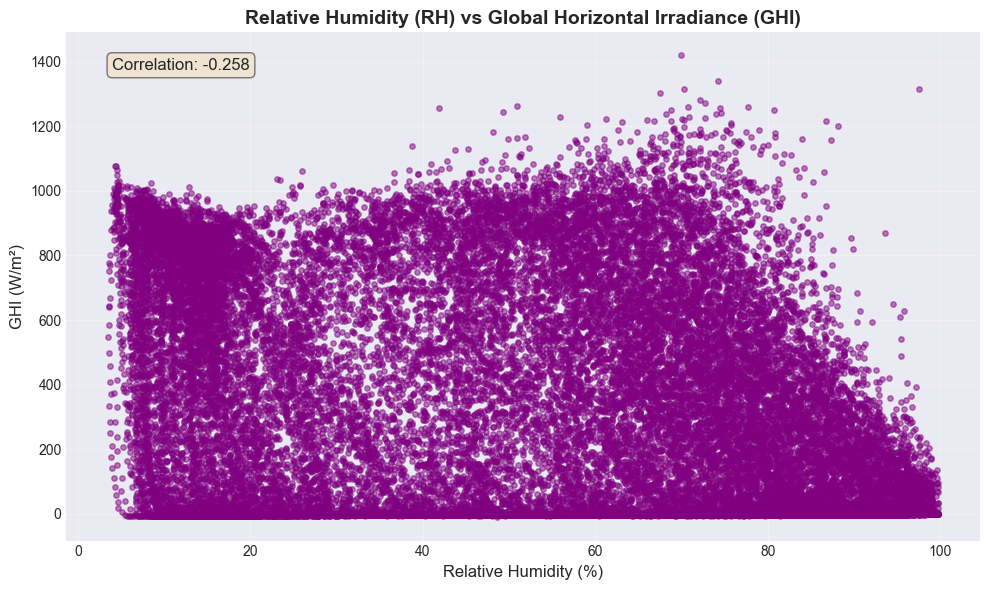

In [33]:
# Additional scatter plot: RH vs GHI
plt.figure(figsize=(10, 6))
plt.scatter(scatter_sample['RH'], scatter_sample['GHI'], alpha=0.5, s=15, color='purple')
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)', fontsize=14, fontweight='bold')
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('GHI (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add correlation
corr_rh_ghi = df_clean['RH'].corr(df_clean['GHI'])
plt.text(0.05, 0.95, f'Correlation: {corr_rh_ghi:.3f}', transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## 8. Wind Analysis & Distributions


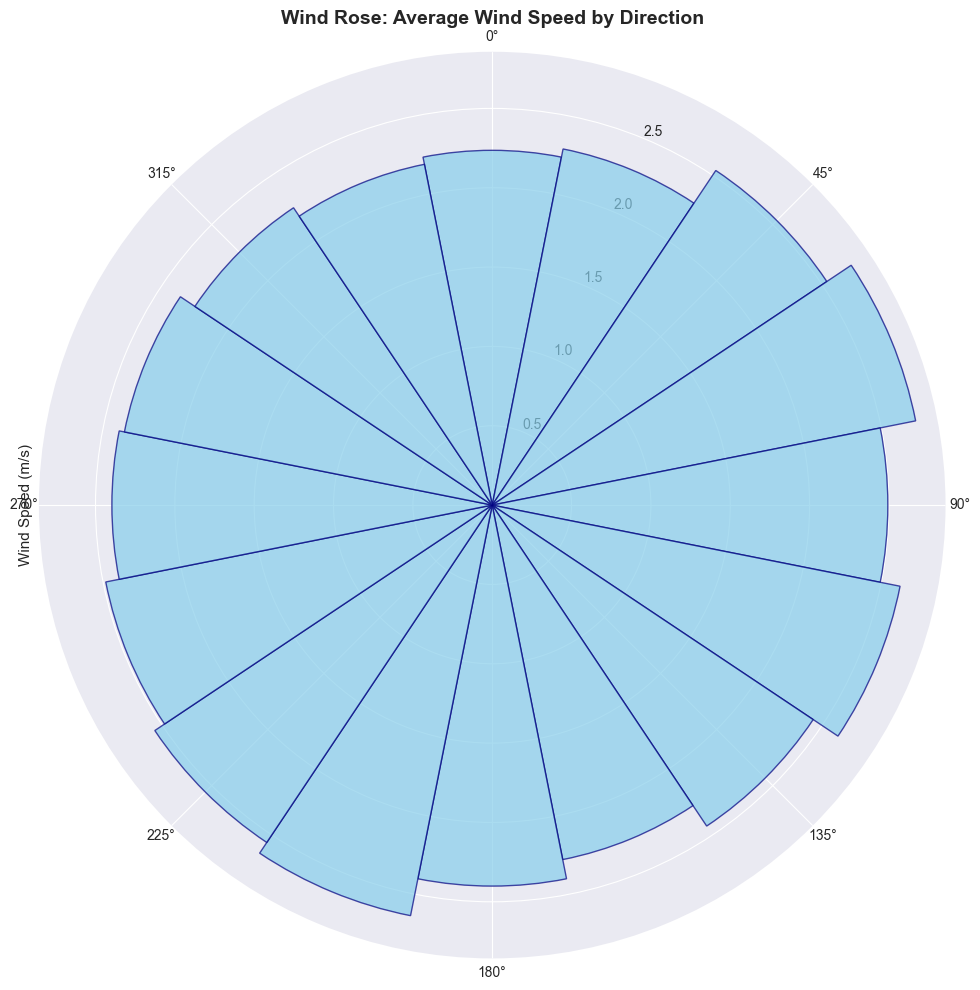

Predominant wind direction: 67.5°
Average wind speed from that direction: 2.72 m/s


In [34]:
# Wind Rose: Polar plot showing wind speed by direction
# Bin wind directions into 16 sectors (N, NNE, NE, ENE, E, etc.)
wind_data = df_clean[['WD', 'WS']].copy()
wind_data = wind_data[wind_data['WS'] > 0]  # Filter out zero wind speed

# Create direction bins
direction_bins = np.arange(0, 360, 22.5)  # 16 sectors
wind_data['WD_bin'] = pd.cut(wind_data['WD'], bins=np.append(direction_bins, 360), 
                               labels=direction_bins, include_lowest=True)

# Calculate average wind speed per direction
wind_by_direction = wind_data.groupby('WD_bin')['WS'].mean()

# Create polar plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# Convert degrees to radians
theta = np.deg2rad(wind_by_direction.index.astype(float))
radii = wind_by_direction.values

# Create bars
bars = ax.bar(theta, radii, width=np.deg2rad(22.5), bottom=0, alpha=0.7, color='skyblue', edgecolor='navy')

# Customize
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Average Wind Speed by Direction', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Wind Speed (m/s)', fontsize=11)

plt.tight_layout()
plt.show()

print(f"Predominant wind direction: {wind_by_direction.idxmax()}°")
print(f"Average wind speed from that direction: {wind_by_direction.max():.2f} m/s")


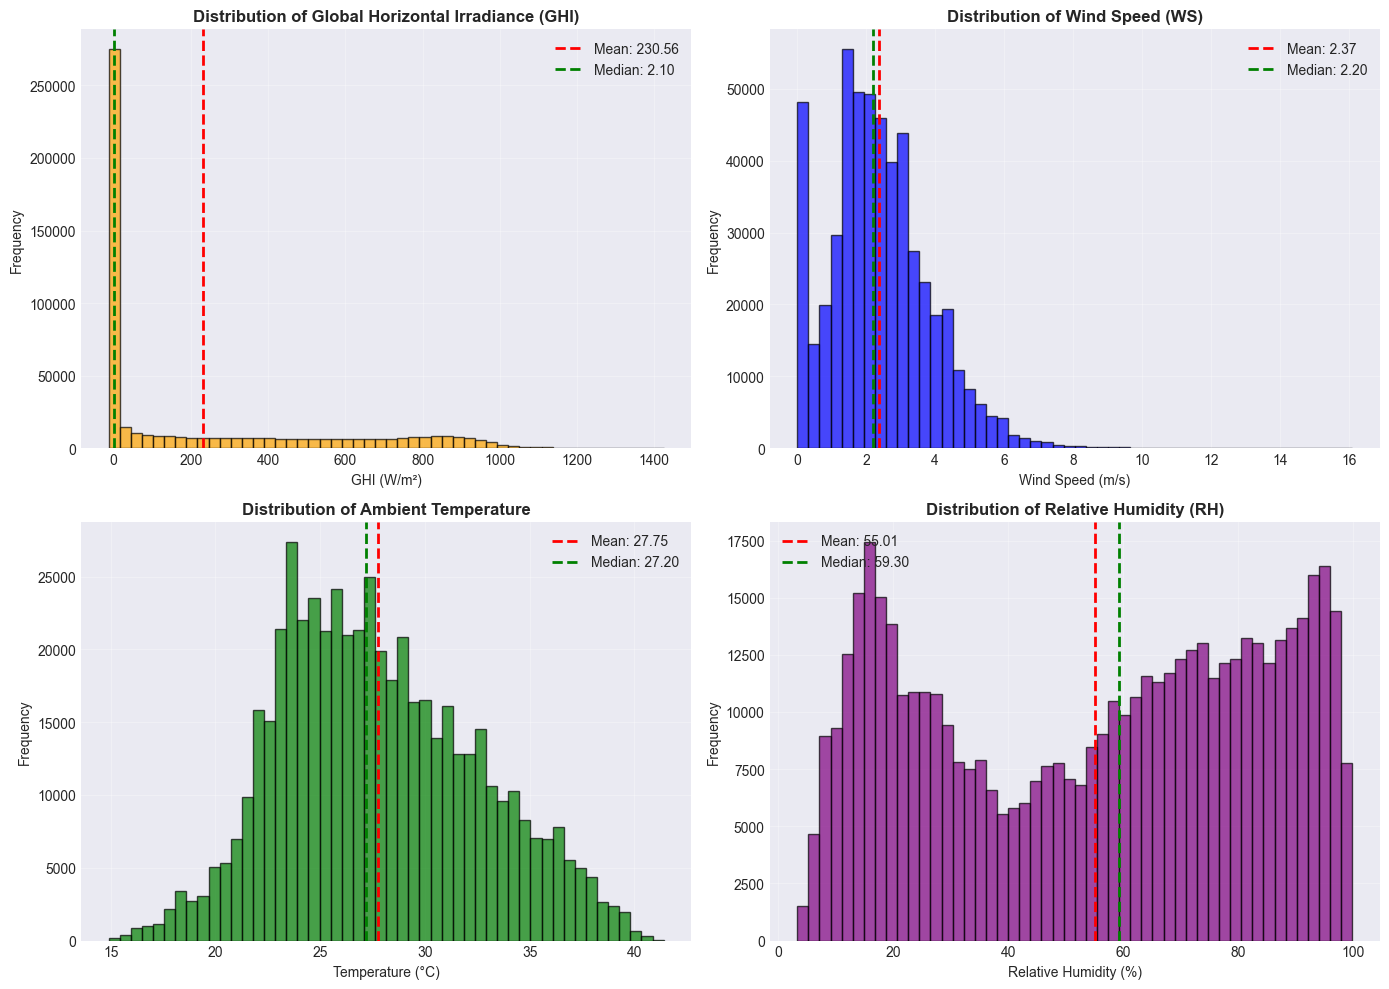

In [35]:
# Histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GHI distribution
axes[0, 0].hist(df_clean['GHI'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Global Horizontal Irradiance (GHI)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('GHI (W/m²)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].axvline(df_clean['GHI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["GHI"].mean():.2f}')
axes[0, 0].axvline(df_clean['GHI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["GHI"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# WS distribution
axes[0, 1].hist(df_clean['WS'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Wind Speed (WS)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Wind Speed (m/s)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].axvline(df_clean['WS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["WS"].mean():.2f}')
axes[0, 1].axvline(df_clean['WS'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["WS"].median():.2f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Temperature distribution
axes[1, 0].hist(df_clean['Tamb'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Ambient Temperature', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Temperature (°C)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].axvline(df_clean['Tamb'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["Tamb"].mean():.2f}')
axes[1, 0].axvline(df_clean['Tamb'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["Tamb"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# RH distribution
axes[1, 1].hist(df_clean['RH'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of Relative Humidity (RH)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Relative Humidity (%)', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].axvline(df_clean['RH'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["RH"].mean():.2f}')
axes[1, 1].axvline(df_clean['RH'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["RH"].median():.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 9. Temperature & Humidity Analysis


TEMPERATURE & HUMIDITY RELATIONSHIP ANALYSIS

Average Temperature and GHI by Humidity Level:


Tamb         GHI
RH_bin                                    
Low (0-25%)          29.299947  318.066825
Medium (25-50%)      29.145488  250.885406
High (50-75%)        29.271018  305.871161
Very High (75-100%)  24.569193   93.782241

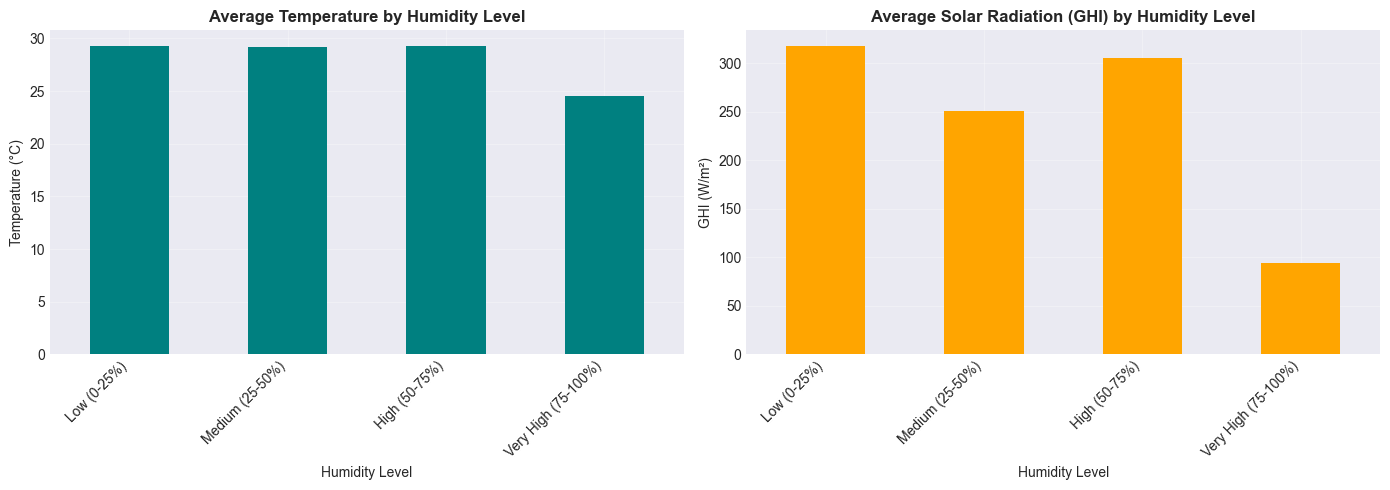

In [36]:
# Analyze how relative humidity influences temperature and solar radiation
print("=" * 80)
print("TEMPERATURE & HUMIDITY RELATIONSHIP ANALYSIS")
print("=" * 80)

# Create humidity bins
df_clean['RH_bin'] = pd.cut(df_clean['RH'], bins=[0, 25, 50, 75, 100], 
                              labels=['Low (0-25%)', 'Medium (25-50%)', 'High (50-75%)', 'Very High (75-100%)'])

# Average temperature and GHI by humidity bin
temp_humid_stats = df_clean.groupby('RH_bin')[['Tamb', 'GHI']].mean()

print("\nAverage Temperature and GHI by Humidity Level:")
display(temp_humid_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature by humidity level
temp_humid_stats['Tamb'].plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Average Temperature by Humidity Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Humidity Level', fontsize=10)
axes[0].set_ylabel('Temperature (°C)', fontsize=10)
axes[0].set_xticklabels(temp_humid_stats.index, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3)

# GHI by humidity level
temp_humid_stats['GHI'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Solar Radiation (GHI) by Humidity Level', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Humidity Level', fontsize=10)
axes[1].set_ylabel('GHI (W/m²)', fontsize=10)
axes[1].set_xticklabels(temp_humid_stats.index, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
# Physical/meteorological insights
print("\n📊 Physical & Meteorological Insights:")
print("  - High humidity typically correlates with cloud cover, reducing solar radiation")
print("  - Temperature and humidity often have an inverse relationship")
print("  - Solar radiation heating during the day reduces relative humidity")
print(f"  - Correlation RH vs Tamb: {df_clean['RH'].corr(df_clean['Tamb']):.3f}")
print(f"  - Correlation RH vs GHI: {df_clean['RH'].corr(df_clean['GHI']):.3f}")



📊 Physical & Meteorological Insights:
  - High humidity typically correlates with cloud cover, reducing solar radiation
  - Temperature and humidity often have an inverse relationship
  - Solar radiation heating during the day reduces relative humidity
  - Correlation RH vs Tamb: -0.400
  - Correlation RH vs GHI: -0.258


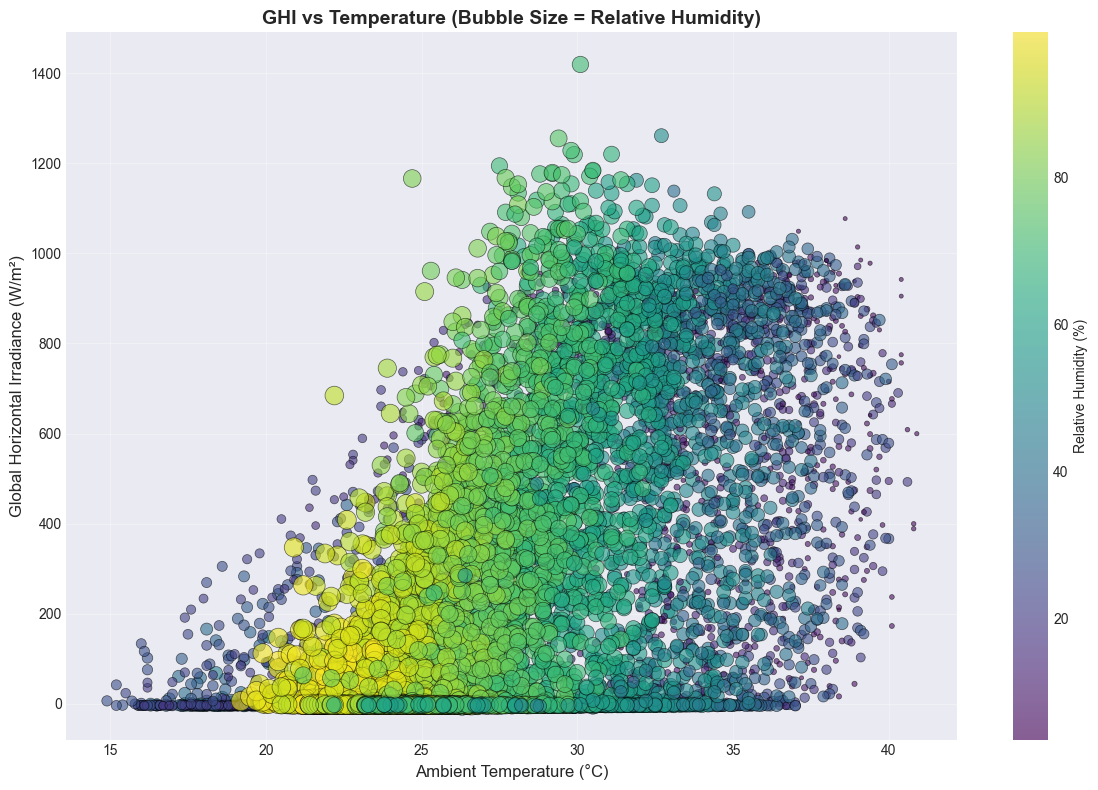


📊 Multi-dimensional Insights:
  - Bubble size and color represent relative humidity
  - Larger/darker bubbles indicate higher humidity conditions
  - Shows relationship between temperature, solar radiation, and humidity simultaneously


In [38]:
# Bubble chart: GHI vs Tamb with bubble size = RH
# Sample data to avoid overcrowding
bubble_sample = df_clean.iloc[::50].copy()

plt.figure(figsize=(12, 8))

# Create bubble chart
scatter = plt.scatter(bubble_sample['Tamb'], bubble_sample['GHI'], 
                     s=bubble_sample['RH']*2,  # Size based on RH
                     c=bubble_sample['RH'],     # Color based on RH
                     cmap='viridis', 
                     alpha=0.6, 
                     edgecolors='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='Relative Humidity (%)')
plt.title('GHI vs Temperature (Bubble Size = Relative Humidity)', fontsize=14, fontweight='bold')
plt.xlabel('Ambient Temperature (°C)', fontsize=12)
plt.ylabel('Global Horizontal Irradiance (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Multi-dimensional Insights:")
print("  - Bubble size and color represent relative humidity")
print("  - Larger/darker bubbles indicate higher humidity conditions")
print("  - Shows relationship between temperature, solar radiation, and humidity simultaneously")


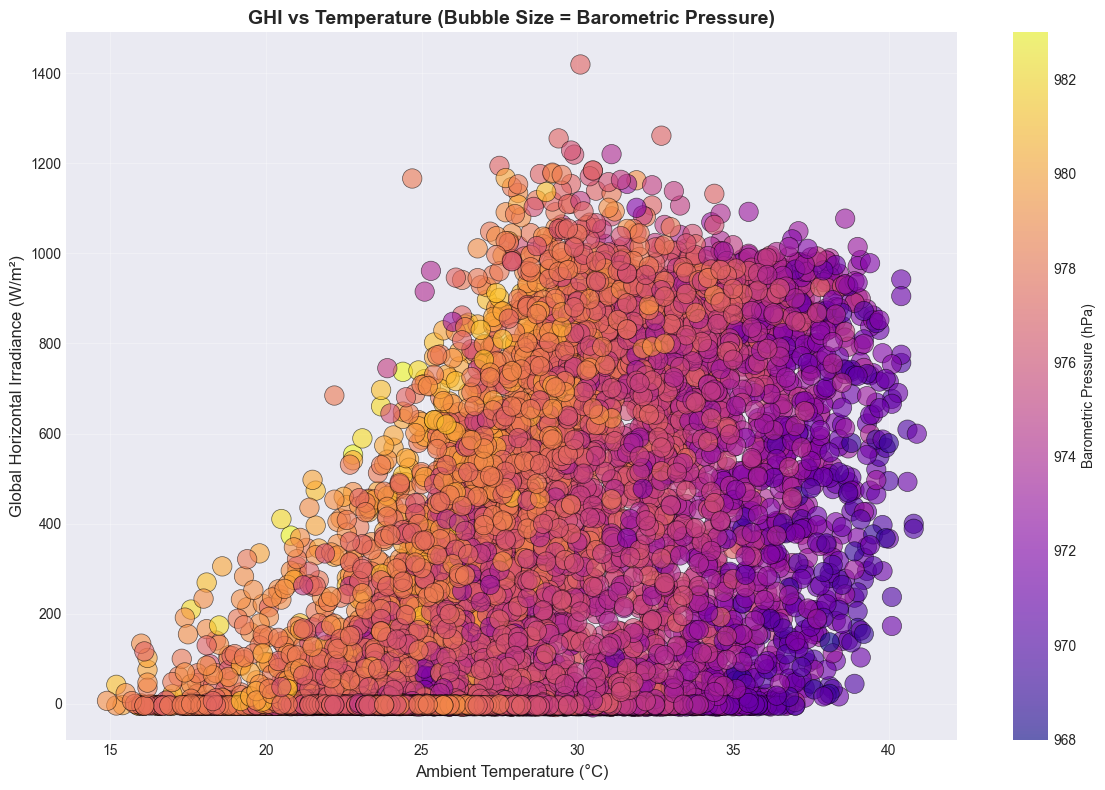


📊 Additional Insights:
  - Barometric pressure variations may indicate weather system changes
  - Lower pressure often associated with cloudy/rainy conditions
  - Higher pressure typically indicates clear, sunny weather


In [39]:
# Alternative bubble chart: GHI vs Tamb with bubble size = BP (Barometric Pressure)
plt.figure(figsize=(12, 8))

# Create bubble chart
scatter2 = plt.scatter(bubble_sample['Tamb'], bubble_sample['GHI'], 
                      s=bubble_sample['BP']/5,   # Size based on BP (scaled down)
                      c=bubble_sample['BP'],      # Color based on BP
                      cmap='plasma', 
                      alpha=0.6, 
                      edgecolors='black',
                      linewidth=0.5)

plt.colorbar(scatter2, label='Barometric Pressure (hPa)')
plt.title('GHI vs Temperature (Bubble Size = Barometric Pressure)', fontsize=14, fontweight='bold')
plt.xlabel('Ambient Temperature (°C)', fontsize=12)
plt.ylabel('Global Horizontal Irradiance (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Additional Insights:")
print("  - Barometric pressure variations may indicate weather system changes")
print("  - Lower pressure often associated with cloudy/rainy conditions")
print("  - Higher pressure typically indicates clear, sunny weather")
